In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
def listToTable(lis):
    table = []
    a = np.asarray(lis)
    for j in range(0, len(lis)):
        a1 = a[j][0:-2].split(' ')
        a2 = map(float, a1)
        a3 = np.asarray(a2)
        table.append(a3)
    table = np.asarray(table)
    return table

In [3]:
def getTableTable(files):
    f = open('data/'+files+'.txt', "r")
    a = f.readlines()
    del a[0]
    list_list = []
    start = []
    table_table = []
    for i in range(0, len(a)):
        if (len(a[i]) == 4):
            start.append(i)
    for i in range(0, len(start)):
        lis = []
        if i != len(start)-1:
            for j in range(1, start[i+1]-start[i]):
                lis.append(a[j+start[i]])
        else:
            for j in range(1, len(a)-start[i]):
                lis.append((a[j+start[i]]))
        list_list.append(lis)
    for i in range(0, len(list_list)):
        table = listToTable(list_list[i])
        table_table.append(table)
    return table_table

In [4]:
def getTableVar(table, var):
    if var == 'x':
        return table[:,0]
    elif var == 'y':
        return table[:,1]
    elif var == 't':
        return table[:,2]
    elif var == 'dx':
        return table[:,3]
    elif var == 'dy':
        return table[:,4]
    elif var == 'dt':
        return table[:,5]
    elif var == 'dr2':
        return table[:,6]
    elif var == 'totDisplacement2':
        return table[:,7]
    else:
        return False

In [5]:
def getNStep(files):
    f = open('data/'+files+'.txt', "r")
    a = f.readlines()
    del a[0]
    start = []
    nstep = []
    for i in range(0, len(a)):
        if (len(a[i]) == 4):
            start.append(i)
    for i in range(0, len(start)):
        if i != len(start)-1:
            nstep.append(start[i+1]-start[i])
        else:
            nstep.append(len(a)-start[i])
    return nstep

In [6]:
def getIndexLongStep(files):
    nstep = getNStep(files)
    zipped = zip(np.arange(len(nstep)), nstep)
    sort = sorted(zipped, key=lambda x: x[1], reverse=True)
    index = np.asarray(sort)[:,0]
    return index

In [7]:
def plt2d(files, left, right, bottom, top, double=False, select=False):
    table_table = getTableTable(files)
    fig = plt.figure(figsize=(6,6))
    for i in range(0,len(table_table)):
        if select == True:
            table = table_table[getIndexLongStep(files)[i]]
            if i == 10:
                break
        else:
            table = table_table[i]
        x = getTableVar(table,'x') * 1e6
        y = getTableVar(table,'y') * 1e6
        if double == True:
            x = x/2
            y = y/2
        plt.plot(x,y)
        plt.xlabel('x [$\mu m$]')
        plt.ylabel('y [$\mu m$]')
        plt.xlim(left=left, right=right)
        plt.ylim(bottom=bottom, top=top)
    plt.title('Particle Tracks')
    plt.savefig('images/'+files+'.pdf', bbox_inches='tight')

In [8]:
def getThD(eta, d):
    kB = 1.38e-23
    T = 293
    D = kB * T / (3 * np.pi * eta * d / 2)
    return D

In [9]:
def getExD(dr2_array, tau, dimensions=2):
    D = np.mean(dr2_array)/(2*dimensions*tau)
    dD = max(dr2_array)/(2*dimensions*tau)
    return D, dD

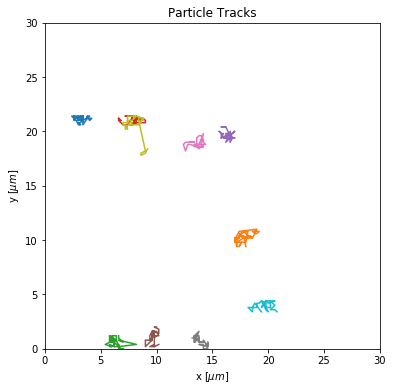

In [10]:
plt2d('1.6_pvp_small', 0, 30, 0, 30, select=True)

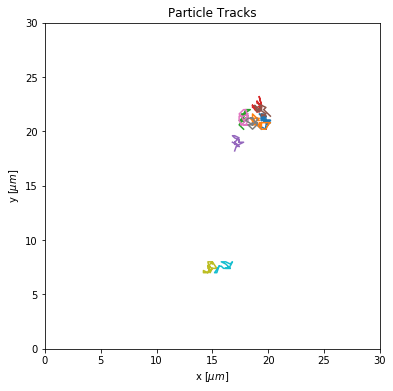

In [11]:
plt2d('2.5_pvp_small', 0, 30, 0, 30, select=True)

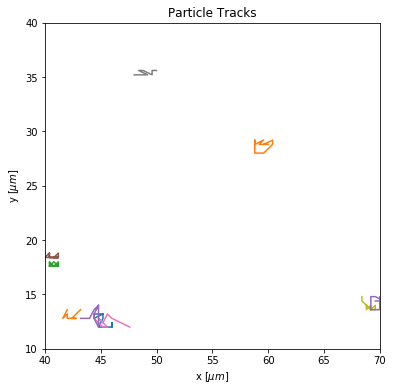

In [12]:
plt2d('4.6_pvp_small_n', 40, 70, 10, 40)

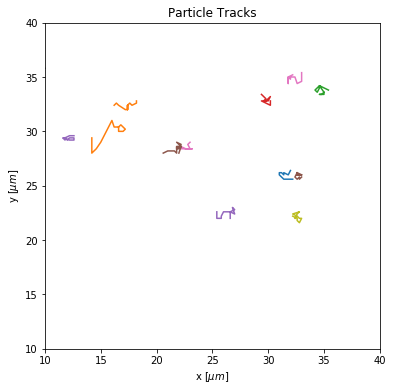

In [13]:
plt2d('1.6_gll_small', 10, 40, 10, 40)

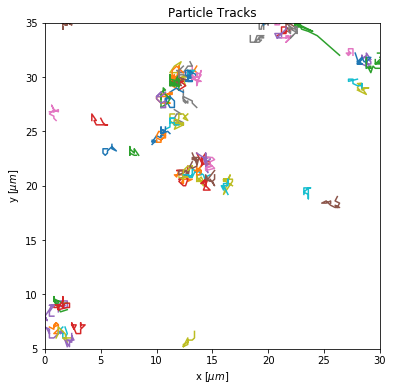

In [14]:
plt2d('2.5_gll_small', 0, 30, 5, 35)

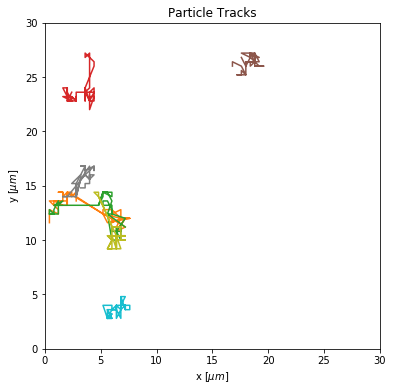

In [15]:
plt2d('4.6_gll_small', 0, 30, 0, 30, select=True)

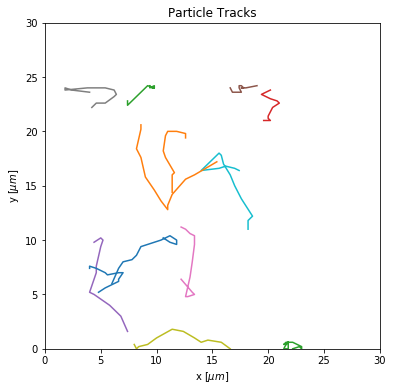

In [16]:
plt2d('1.6_pvp_big_x2', 0, 30, 0, 30, double=True)

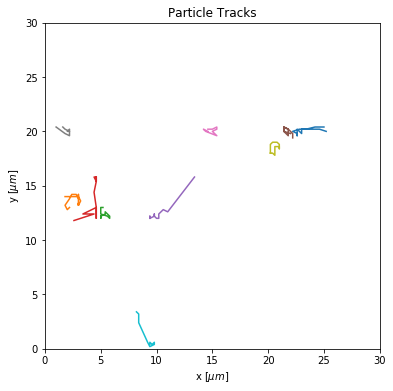

In [17]:
plt2d('2.5_pvp_big', 0, 30, 0, 30, select=True)

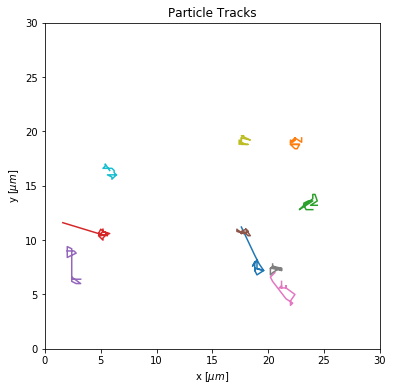

In [18]:
plt2d('4.6_pvp_big', 0, 30, 0, 30, select=True)

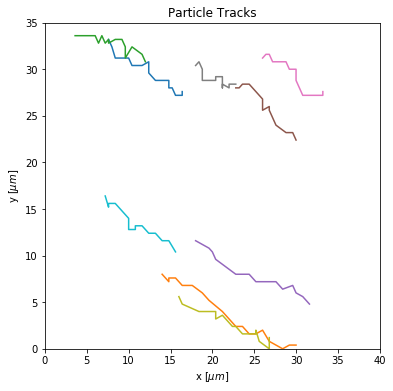

In [19]:
plt2d('onion_1', 0, 40, 0, 35, select=True)

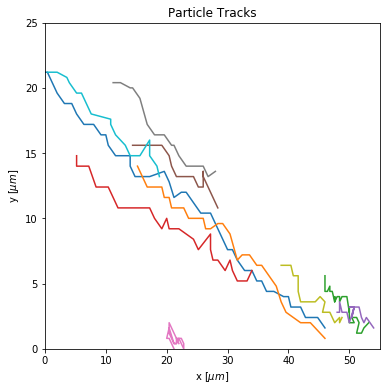

In [20]:
plt2d('onion_2', 0, 55, 0, 25, select=True)

In [10]:
def getMeanD(files, double=False):
    D_array = []
    dD_array = []
    table_table = getTableTable(files)
    for table in table_table:
        if double == True:
            dr2 = getTableVar(table, 'dr2')/4
        else:
            dr2 = getTableVar(table, 'dr2')
        tau_array = np.mean(getTableVar(table, 'dt')[1:])
        D, dD = getExD(dr2, np.mean(tau_array))
        D_array.append(D)
        dD_array.append(dD)
    return np.mean(D_array), np.mean(dD_array)

In [13]:
def compareD(eta, d, files):
    thD = getThD(eta, d)
    exD = getMeanD(files)[0]
    percentErr = 100 * abs(exD - thD) / thD
    print 'Theory: ', thD, 'Exp: ', exD, 'Percent error: ', percentErr

In [15]:
compareD(1.66E-3, 0.4E-6, '1.6_pvp_small')

Theory:  1.29222308614e-12 Exp:  1.6852184318791913e-12 Percent error:  30.4123452021723


In [16]:
compareD(2.5E-3, 0.4E-6, '2.5_pvp_small')

Theory:  8.58036129197e-13 Exp:  1.2168319077098123e-12 Percent error:  41.81592899223919


In [18]:
compareD(4.65E-3, 0.4E-6, '4.6_pvp_small_n')

Theory:  4.6130974688e-13 Exp:  1.3850751674777466e-12 Percent error:  200.24840724591917


In [19]:
compareD(1.66E-3, 0.4E-6, '1.6_gll_small')

Theory:  1.29222308614e-12 Exp:  9.2575901517861e-13 Percent error:  28.359195474221593


In [20]:
compareD(2.5E-3, 0.4E-6, '2.5_gll_small')

Theory:  8.58036129197e-13 Exp:  1.1086403597580635e-12 Percent error:  29.206722425028854


In [21]:
compareD(4.65E-3, 0.4E-6, '4.6_gll_small')

Theory:  4.6130974688e-13 Exp:  4.683991705374278e-12 Percent error:  915.3680335289954


In [23]:
compareD(2.5E-3, 0.96E-6, '2.5_pvp_big')

Theory:  3.57515053832e-13 Exp:  1.4812843021240493e-12 Percent error:  314.32781256246886


In [25]:
compareD(4.65E-3, 0.96E-6, '4.6_pvp_big')

Theory:  1.92212394533e-13 Exp:  1.3353281119625716e-12 Percent error:  594.71488308765


In [31]:
def getv(table):
    t = getTableVar(table, 't')
    x = getTableVar(table, 'x')
    y = getTableVar(table, 'y')
    vx = (x[-1]-x[0])/(t[-1]-t[0])
    vy = (y[-1]-y[0])/(t[-1]-t[0])
    v = np.array([vx, vy])
    return v

In [76]:
def getAllv(files):
    table_table = getTableTable(files)
    v_array = []
    for table in table_table:
        v = getv(table)
        v_array.append(v)
    v_array = np.asarray(v_array)
    return v_array

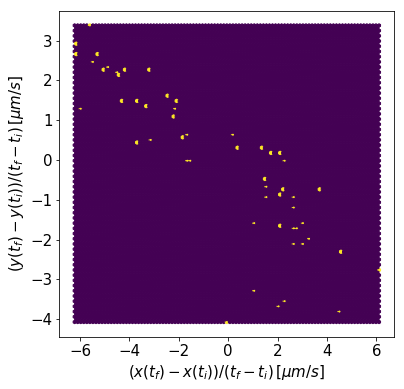

In [77]:
v_array = getAllv('onion_1')
fig = plt.figure(figsize=(6,6))
plt.hexbin(v_array[:,0]*1e6, v_array[:,1]*1e6)
plt.xlabel('$(x(t_f)-x(t_i))/(t_f - t_i) \, [\mu m/s]$', fontsize=15)
plt.ylabel('$(y(t_f)-y(t_i))/(t_f - t_i) \, [\mu m/s]$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/onion1.pdf', bbox_inches='tight')

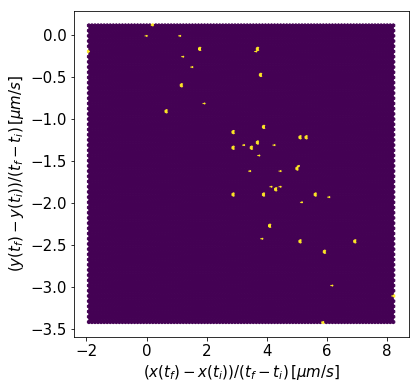

In [78]:
v_array = getAllv('onion_2')
fig = plt.figure(figsize=(6,6))
plt.hexbin(v_array[:,0]*1e6, v_array[:,1]*1e6)
plt.xlabel('$(x(t_f)-x(t_i))/(t_f - t_i) \, [\mu m/s]$', fontsize=15)
plt.ylabel('$(y(t_f)-y(t_i))/(t_f - t_i) \, [\mu m/s]$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/onion2.pdf', bbox_inches='tight')

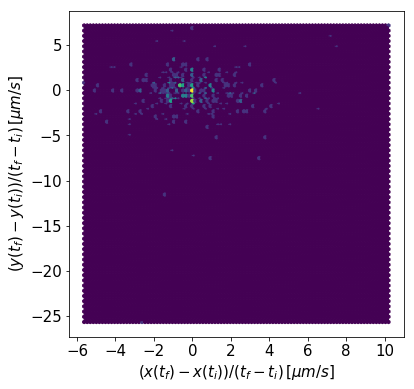

In [88]:
v_array = getAllv('1.6_pvp_small')
fig = plt.figure(figsize=(6,6))
plt.hexbin(v_array[:,0]*1e6, v_array[:,1]*1e6)
plt.xlabel('$(x(t_f)-x(t_i))/(t_f - t_i) \, [\mu m/s]$', fontsize=15)
plt.ylabel('$(y(t_f)-y(t_i))/(t_f - t_i) \, [\mu m/s]$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/1.6v.pdf', bbox_inches='tight')

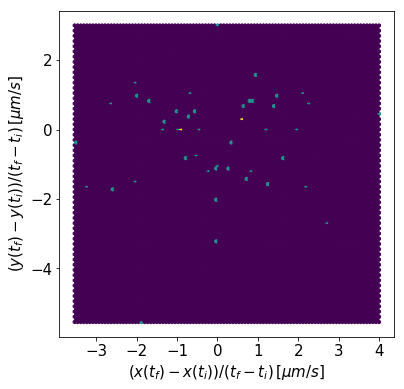

In [89]:
v_array = getAllv('2.5_pvp_small')
fig = plt.figure(figsize=(6,6))
plt.hexbin(v_array[:,0]*1e6, v_array[:,1]*1e6)
plt.xlabel('$(x(t_f)-x(t_i))/(t_f - t_i) \, [\mu m/s]$', fontsize=15)
plt.ylabel('$(y(t_f)-y(t_i))/(t_f - t_i) \, [\mu m/s]$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/2.5v.pdf', bbox_inches='tight')

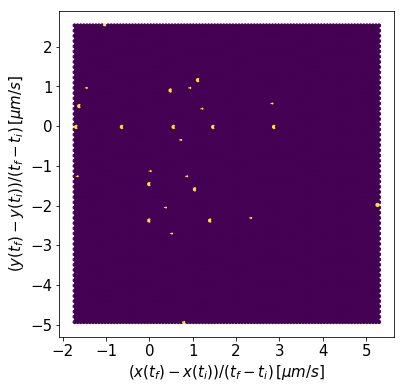

In [96]:
v_array = getAllv('4.6_pvp_small_n')
fig = plt.figure(figsize=(6,6))
plt.hexbin(v_array[:,0]*1e6, v_array[:,1]*1e6)
plt.xlabel('$(x(t_f)-x(t_i))/(t_f - t_i) \, [\mu m/s]$', fontsize=15)
plt.ylabel('$(y(t_f)-y(t_i))/(t_f - t_i) \, [\mu m/s]$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('images/4.6v.pdf', bbox_inches='tight')

In [92]:
table_table = getTableTable('1.6_pvp_small')
v_array = []
for table in table_table:
    v = getv(table)
    v_array.append(v)
v_array = np.asarray(v_array)
mean_vx= np.mean(v_array[:,0])*1e6
mean_vy = np.mean(v_array[:,1])*1e6
err_vx = np.std(v_array[:,0])/np.sqrt(len(v_array[:,0]))*1e6
err_vy = np.std(v_array[:,1])/np.sqrt(len(v_array[:,1]))*1e6
print mean_vx, err_vx, mean_vy, err_vy

-0.009911870891698581 0.11038590296880163 -0.24663639544626575 0.14353970963943669


In [93]:
table_table = getTableTable('2.5_pvp_small')
v_array = []
for table in table_table:
    v = getv(table)
    v_array.append(v)
v_array = np.asarray(v_array)
mean_vx= np.mean(v_array[:,0])*1e6
mean_vy = np.mean(v_array[:,1])*1e6
err_vx = np.std(v_array[:,0])/np.sqrt(len(v_array[:,0]))*1e6
err_vy = np.std(v_array[:,1])/np.sqrt(len(v_array[:,1]))*1e6
print mean_vx, err_vx, mean_vy, err_vy

-0.06605691165014102 0.22933674385453634 -0.2811540669583079 0.20342377143681847


In [95]:
table_table = getTableTable('4.6_pvp_small_n')
v_array = []
for table in table_table:
    v = getv(table)
    v_array.append(v)
v_array = np.asarray(v_array)
mean_vx= np.mean(v_array[:,0])*1e6
mean_vy = np.mean(v_array[:,1])*1e6
err_vx = np.std(v_array[:,0])/np.sqrt(len(v_array[:,0]))*1e6
err_vy = np.std(v_array[:,1])/np.sqrt(len(v_array[:,1]))*1e6
print mean_vx, err_vx, mean_vy, err_vy

0.6507387169201346 0.30476236112354294 -0.6864315353976884 0.3098441354867295


In [85]:
table_table = getTableTable('onion_1')
v_array_neg = []
v_array_pos = []
for table in table_table:
    v = getv(table)
    if v[0] < -1e-6:
        v_array_neg.append(v)
    elif v[0] > 1e-6:
        v_array_pos.append(v)
v_array_neg = np.asarray(v_array_neg)
v_array_pos = np.asarray(v_array_pos)
mean_vx_neg = np.mean(v_array_neg[:,0])*1e6
mean_vy_neg = np.mean(v_array_neg[:,1])*1e6
mean_vx_pos = np.mean(v_array_pos[:,0])*1e6
mean_vy_pos = np.mean(v_array_pos[:,1])*1e6
err_vx_neg = np.std(v_array_neg[:,0])/np.sqrt(len(v_array_neg[:,0]))*1e6
err_vy_neg = np.std(v_array_neg[:,1])/np.sqrt(len(v_array_neg[:,1]))*1e6
err_vx_pos = np.std(v_array_pos[:,0])/np.sqrt(len(v_array_pos[:,0]))*1e6
err_vy_pos = np.std(v_array_pos[:,1])/np.sqrt(len(v_array_pos[:,1]))*1e6
print mean_vx_neg, err_vx_neg, mean_vy_neg, err_vy_neg, mean_vx_pos, err_vx_pos, mean_vy_pos, err_vy_pos

-3.783126561835586 0.3036743606758363 1.6381452179056606 0.18154836605985497 2.5516578112788983 0.22535698354261116 -1.5271668096984528 0.23046915991073358


In [87]:
table_table = getTableTable('onion_2')
v_array = []
for table in table_table:
    v = getv(table)
    if v[0] < -1e-6 or v[0] > 1e-6 or v[1] < -1e-6 or v[1] > 1e-6:
        v_array.append(v)
v_array = np.asarray(v_array)
mean_vx= np.mean(v_array[:,0])*1e6
mean_vy = np.mean(v_array[:,1])*1e6
err_vx = np.std(v_array[:,0])/np.sqrt(len(v_array[:,0]))*1e6
err_vy = np.std(v_array[:,1])/np.sqrt(len(v_array[:,1]))*1e6
print mean_vx, err_vx, mean_vy, err_vy

3.9451080165509205 0.288585765513913 -1.4758978438931691 0.1352266067191205


In [5]:
def getdr(table):
    dx = getTableVar(table, 'dx')
    dy = getTableVar(table, 'dy')
    dr = np.array([np.mean(dx), np.mean(dy)])
    return dr

In [6]:
def getAlldr(files):
    table_table = getTableTable(files)
    dr_array = []
    for table in table_table:
        dr = getdr(table)
        dr_array.append(dr)
    dr_array = np.asarray(dr_array)
    return dr_array

In [45]:
mean_dx_array = []
mean_dy_array = []
err_dx_array = []
err_dy_array = []
label_array = []

In [46]:
dr_array = getAlldr('1.6_pvp_small')
mean_dx= np.mean(dr_array[:,0])*1e6
mean_dy = np.mean(dr_array[:,1])*1e6
err_dx = np.std(dr_array[:,0])/np.sqrt(len(dr_array[:,0]))*1e6
err_dy = np.std(dr_array[:,1])/np.sqrt(len(dr_array[:,1]))*1e6
mean_dx_array.append(mean_dx)
mean_dy_array.append(mean_dy)
err_dx_array.append(err_dx)
err_dy_array.append(err_dy)
label_array.append(r'0.4$\mu m$ beads in 1.66 cP PVP')

In [47]:
dr_array = getAlldr('2.5_pvp_small')
mean_dx= np.mean(dr_array[:,0])*1e6
mean_dy = np.mean(dr_array[:,1])*1e6
err_dx = np.std(dr_array[:,0])/np.sqrt(len(dr_array[:,0]))*1e6
err_dy = np.std(dr_array[:,1])/np.sqrt(len(dr_array[:,1]))*1e6
mean_dx_array.append(mean_dx)
mean_dy_array.append(mean_dy)
err_dx_array.append(err_dx)
err_dy_array.append(err_dy)
label_array.append(r'0.4$\mu m$ beads in 2.50 cP PVP')

In [48]:
dr_array = getAlldr('4.6_pvp_small_n')
mean_dx= np.mean(dr_array[:,0])*1e6
mean_dy = np.mean(dr_array[:,1])*1e6
err_dx = np.std(dr_array[:,0])/np.sqrt(len(dr_array[:,0]))*1e6
err_dy = np.std(dr_array[:,1])/np.sqrt(len(dr_array[:,1]))*1e6
mean_dx_array.append(mean_dx)
mean_dy_array.append(mean_dy)
err_dx_array.append(err_dx)
err_dy_array.append(err_dy)
label_array.append(r'0.4$\mu m$ beads in 4.65 cP PVP')

In [49]:
dr_array = getAlldr('1.6_gll_small')
mean_dx= np.mean(dr_array[:,0])*1e6
mean_dy = np.mean(dr_array[:,1])*1e6
err_dx = np.std(dr_array[:,0])/np.sqrt(len(dr_array[:,0]))*1e6
err_dy = np.std(dr_array[:,1])/np.sqrt(len(dr_array[:,1]))*1e6
mean_dx_array.append(mean_dx)
mean_dy_array.append(mean_dy)
err_dx_array.append(err_dx)
err_dy_array.append(err_dy)
label_array.append(r'0.4$\mu m$ beads in 1.66 cP glycerol')

In [50]:
dr_array = getAlldr('2.5_gll_small')
mean_dx= np.mean(dr_array[:,0])*1e6
mean_dy = np.mean(dr_array[:,1])*1e6
err_dx = np.std(dr_array[:,0])/np.sqrt(len(dr_array[:,0]))*1e6
err_dy = np.std(dr_array[:,1])/np.sqrt(len(dr_array[:,1]))*1e6
mean_dx_array.append(mean_dx)
mean_dy_array.append(mean_dy)
err_dx_array.append(err_dx)
err_dy_array.append(err_dy)
label_array.append(r'0.4$\mu m$ beads in 2.50 cP glycerol')

In [51]:
dr_array = getAlldr('4.6_gll_small')
mean_dx= np.mean(dr_array[:,0])*1e6
mean_dy = np.mean(dr_array[:,1])*1e6
err_dx = np.std(dr_array[:,0])/np.sqrt(len(dr_array[:,0]))*1e6
err_dy = np.std(dr_array[:,1])/np.sqrt(len(dr_array[:,1]))*1e6
mean_dx_array.append(mean_dx)
mean_dy_array.append(mean_dy)
err_dx_array.append(err_dx)
err_dy_array.append(err_dy)
label_array.append(r'0.4$\mu m$ beads in 4.65 cP glycerol')

In [57]:
dr_array = getAlldr('1.6_pvp_big_x2')
mean_dx= np.mean(dr_array[:,0]/2)*1e6
mean_dy = np.mean(dr_array[:,1]/2)*1e6
err_dx = np.std(dr_array[:,0]/2)/np.sqrt(len(dr_array[:,0]/2))*1e6
err_dy = np.std(dr_array[:,1]/2)/np.sqrt(len(dr_array[:,1]/2))*1e6
mean_dx_array.append(mean_dx)
mean_dy_array.append(mean_dy)
err_dx_array.append(err_dx)
err_dy_array.append(err_dy)
print err_dx
label_array.append(r'0.96$\mu m$ beads in 1.66 cP PVP')

0.07495158060275776


In [53]:
dr_array = getAlldr('2.5_pvp_big')
mean_dx= np.mean(dr_array[:,0])*1e6
mean_dy = np.mean(dr_array[:,1])*1e6
err_dx = np.std(dr_array[:,0])/np.sqrt(len(dr_array[:,0]))*1e6
err_dy = np.std(dr_array[:,1])/np.sqrt(len(dr_array[:,1]))*1e6
mean_dx_array.append(mean_dx)
mean_dy_array.append(mean_dy)
err_dx_array.append(err_dx)
err_dy_array.append(err_dy)
label_array.append(r'0.96$\mu m$ beads in 2.50 cP PVP')

In [54]:
dr_array = getAlldr('4.6_pvp_big')
mean_dx= np.mean(dr_array[:,0])*1e6
mean_dy = np.mean(dr_array[:,1])*1e6
err_dx = np.std(dr_array[:,0])/np.sqrt(len(dr_array[:,0]))*1e6
err_dy = np.std(dr_array[:,1])/np.sqrt(len(dr_array[:,1]))*1e6
mean_dx_array.append(mean_dx)
mean_dy_array.append(mean_dy)
err_dx_array.append(err_dx)
err_dy_array.append(err_dy)
label_array.append(r'0.96$\mu m$ beads in 4.65 cP PVP')

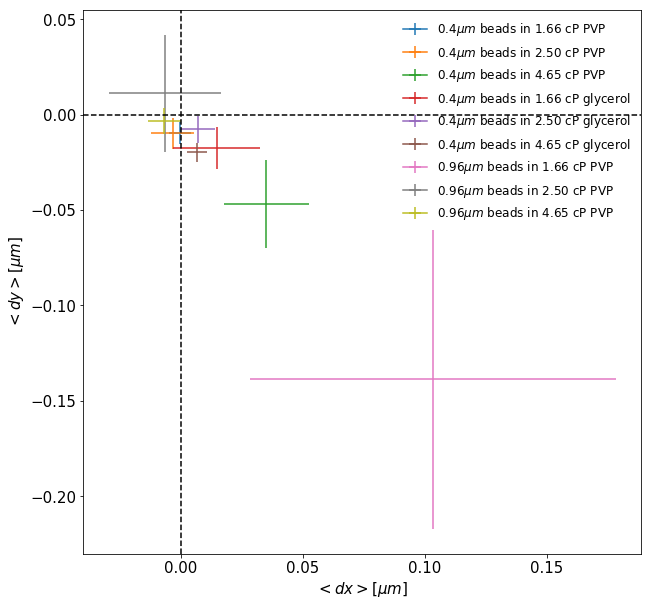

In [56]:
fig = plt.figure(figsize=(10,10))
for i in range(0, len(label_array)):
    plt.errorbar(mean_dx_array[i], mean_dy_array[i], xerr = err_dx_array[i], yerr = err_dy_array[i], label = label_array[i])
plt.legend(prop={'size': 12}, frameon=False, loc='best')
plt.xlabel('$<dx> [\mu m]$', fontsize = 15)
plt.ylabel('$<dy> [\mu m]$', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.axvline(color="black", linestyle="--")
plt.axhline(color="black", linestyle="--")
plt.savefig('images/dr.pdf', bbox_inches='tight')